## Matt Viteri & Yu Mo

In [144]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

### Problem 1: Multi-class Classification – MNIST

In this exercise you will explore the MNIST data set which you will find here: https://www.openml.org/d/554.   MNIST  is  a  data  set  of  handwritten  digits,  and  is  considered  one  of  the“easiest” image recognition problems in computer vision.

* Use the fetch_openml command from sklearn.datasets to import the MNIST data set

* Use Random Forests to try to get the best possible test accuracy on MNIST. This involves getting  acquainted  with  how  Random  Forests  work,  understanding  their  parameters,  and therefore using Cross Validation to find the best settings.  How well can you do?  You should use the accuracy metric, since this is what you used in Lab 5 – therefore this will allow you to compare your results from Random Forests with your results from L1- and L2- Regularized Logistic Regression.  What are the hyperparameters of your best model?

* Use  Boosting  to  do  the  same.   Take  the  time  to  understand  how  XGBoost  works  (and/orother boosting packages available).  Try your best to tune your hyper-parameters.  As added motivation:  typically the winners and near-winners of the Kaggle competition are those that are best able to tune an cross validate XGBoost.  What are the hyperparameters of your bestmodel?

* (Optional)  Run  multi-class  logistic  regression  on  these  using  the  cross  entropy  loss.   Youmay  have  to  play  around  with  the  hyperparameters  (especially  the  tolerance)  to  get  it  toconverge in a reasonable amount of time.  I recommend the SAGA solver.  Try to optimizethe hyperparameters.  Report your training and test loss from above

* (Optional) Choose an l1 regularizer (penalty), and see if you can get a sparse solution withalmost as good accuracy.

* (Optional) Note that in Logistic Regression, the coefficients returned (i.e., theβ’s) are thesame dimension as the data.  Therefore we can pretend that the coefficients of the solution are an image of the same dimension, and plot it.  Do this for the 10 sets of coefficients thatcorrespond to the 10 classes.  You should observe that, at least for the sparse solutions, these“kind of” look like the digits they are classifying.

**Fetch openml**

In [94]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

**Random Forest Accuracy**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
rf = RandomForestClassifier(random_state=123)

# check hyperparameters
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [97]:
hyperparameters = {
    'max_features': ['auto', 'sqrt', 0.33],
    'min_samples_leaf': [1, 3, 5, 10]
}

In [98]:
# perform cross-validation with hyperparmeters
model = GridSearchCV(rf, hyperparameters, cv=10, n_jobs=-1)

# fit model
model.fit(X_train, y_train)

/Users/matt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 0.33], 'min_samples_leaf': [1, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**This is the holdout accuracy score. In order to get the real accuracy we need to calculate the accuracy score using the predictions**

In [99]:
model.best_score_

0.9489285714285715

**Test accuracy score**

In [100]:
pred = model.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9509285714285715

**Best hyperparameters**

In [101]:
model.best_params_

{'max_features': 0.33, 'min_samples_leaf': 3}

### XGBoost Accuracy

In [102]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10)
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softmax',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'num_class': 10}

In [103]:
# reshaping data due to time/memory contraints
# before running xgb model

t = X_train[:5000, :350]
t.shape

y2 = y_train[:5000]

In [104]:
parameters = {
  'max_depth': [3, 6],
  'n_estimators': [100, 200]
}

# perform cross-validation on xgb with hyperparmeters
x_model = GridSearchCV(xgb_model, parameters, cv=10, n_jobs=-1)

# fit model
x_model.fit(t, y2)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=10,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 6], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**Holdout accuracy score**

In [105]:
x_model.best_score_

0.8692

**Test accuracy score**

In [106]:
x_pred = x_model.best_estimator_.predict(X_test[:5000, :350])
accuracy_score(y_test[:5000], x_pred)

0.86

**Best hyperparameters**

In [73]:
x_model.best_params_

{'max_depth': 6, 'n_estimators': 200}

### Problem 2: CIFAR-10

In this problem you will explore the data set CIFAR-10, just as you did above for MNIST. Now that you have your pipeline set up, it should be easy to apply the above procedure to CIFAR-10. If you did something that takes significant computation time, keep in mind that CIFAR-10 is a few times larger.

* (Optional) You can read about the CIFAR-10 and CIFAR-100 data sets here: https://www.cs.toronto.edu/~kriz/cifar.html.

* (Optional)  OpenML  curates  a  number  of  data  sets.   You  will  use  a  subset  of  CIFAR-10 provided by them.  Read here for a description: https://www.openml.org/d/40926.

* Use  the fetch_openml command  fromsklearn.datasets to  import  the  CIFAR-10-Small data set.

* Figure out how to display some of the images in this data set, and display a couple.  While not high resolution, these should be recognizable if you are doing it correctly.

* What is the best accuracy you can get on the test data, by tuning Random Forests?  What are the hyperparameters of your best model?

* What is the best accuracy you can get on the test data, by tuning XGBoost?  What are the hyperparameters of your best model?

* (Optional) You will run multi-class logistic regression on these using the cross entropy loss. You have to specify this specifically (multiclass=’multinomial’). Use cross validation to see how good your accuracy can be.  In this case, cross validate to find as good regularization coefficients  as  you  can, for `l1` & `l2` regularization  (called  penalties),  which  are  naturally supported in sklearn.linearmodel.LogisticRegression. As with MNIST, I recommend you use the solver saga.

* (Optional) Report your training and test loss from above.

* (Optional) How sparse can you make your solutions without deteriorating your testing error too much? Here, I am asking you to try to obtain a sparse solution that has test accuracy that is close to the best solution you found.

In [2]:
# Fetch the CIFAR-10-Small dataset.
X_cifar, y_cifar = fetch_openml('CIFAR_10_small', version=1, return_X_y=True)

In [5]:
X_cifar.shape

(20000, 3072)

In [6]:
X_cifar_01 = X_cifar/255.0
y_cifar = np.array([int(label) for label in y_cifar])

Images in the original dataset has the shape of 3072, which is flatterned. From the observation, we find that it has to be reshaped as (3, 32, 32), which is the channel first. But plt.imshow() works in the way of channel last. So we need to first reshape the image data and then move the axis.

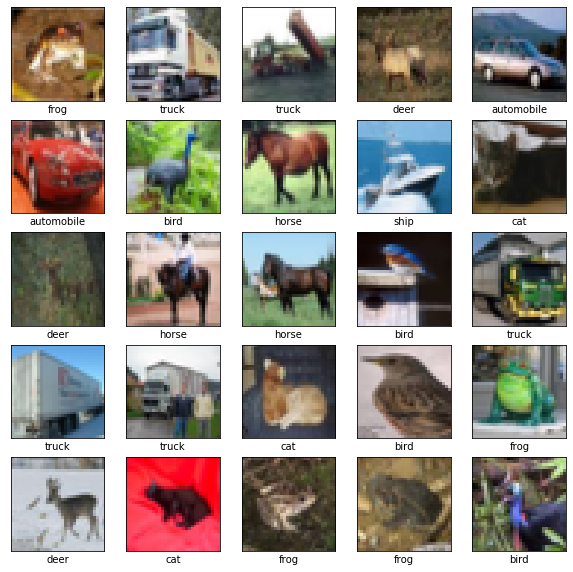

In [28]:
# Display some of the images in th data set.
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.moveaxis(X_cifar_01[i].reshape(3, 32, 32), 0, 2), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_cifar[i]])
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_cifar_01, y_cifar, test_size=0.2)

### Random Forest

In [37]:
randForest = RandomForestClassifier()
tuned_para = [{'criterion': ['gini'],'n_estimators': np.arange(10,100,10), 'max_depth': np.arange(2,5,1)},
                    {'criterion': ['entropy'], 'n_estimators': np.arange(10,100,10), 'max_depth': np.arange(2,5,1)}]
rf_GS = GridSearchCV(randForest, tuned_para, cv=5)

rf_GS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [39]:
print("Best parameters set found on development set:")
print(rf_GS.best_params_)
print("Best score:")
print(rf_GS.best_score_)

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 80}
Best score:
0.3195625


In [41]:
tuned_para = {'criterion': ['gini'],'n_estimators': [80], 'max_depth': [4], 'max_features': ['auto', 'sqrt', 0.5, 0.33]}
rf_GS = GridSearchCV(randForest, tuned_para, cv=5)

rf_GS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [40]:
tuned_para = {'criterion': ['gini'],'n_estimators': [80], 'max_depth': [4], 'max_features': ['auto', 'sqrt', 0.5, 0.33]}
rf_GS = GridSearchCV(randForest, tuned_para, cv=5)

In [42]:
print("Best parameters set found for second round:")
print(rf_GS.best_params_)
print("Best score for second round:")
print(rf_GS.best_score_)

Best parameters set found for second round:
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 80}
Best score for second round:
0.318625


In [43]:
tuned_para = {'criterion': ['gini'],'n_estimators': [80, 90, 100], 'max_depth': [4], 'max_features': ['auto']}
rf_GS = GridSearchCV(randForest, tuned_para, cv=5)

In [44]:
rf_GS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [45]:
print("Best parameters set found for final round:")
print(rf_GS.best_params_)
print("Best score for final round:")
print(rf_GS.best_score_)

Best parameters set found for final round:
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
Best score for final round:
0.320625


In [46]:
y_pred = rf_GS.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.3215

The GridSearch of Random Forest Classifier takes too much time to train, as there are 16000 samples to fit and each sample has 3072 features. The best model we get from hyperparameters tuning shows a relatively low accuracy as 0.3215. This is because the bare input for classifier is the flatterned list of pixel values, it somehow loses its spacial information and texture. It may not performs that well.

Since each sample is a colorfuk image, it has three channels value in one location. We want to try out whether the shape is the determinant factor in classification.

In [7]:
X_cifar_red = X_cifar_01[:,:1024]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_cifar_red, y_cifar, test_size=0.2)

In [19]:
randForest = RandomForestClassifier()
tuned_para = [{'criterion': ['gini'],'n_estimators': np.arange(10,100,10), 'max_depth': np.arange(2,5,1)},
                    {'criterion': ['entropy'], 'n_estimators': np.arange(10,100,10), 'max_depth': np.arange(2,5,1)}]
rf_GS = GridSearchCV(randForest, tuned_para, cv=5)

rf_GS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [20]:
print("Best parameters set found for final round:")
print(rf_GS.best_params_)
print("Best score for final round:")
print(rf_GS.best_score_)

Best parameters set found for final round:
{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
Best score for final round:
0.2498125


It seems that use one channel could not represent the most of the information in one image.

### XGBoost

In [22]:
xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=10)
# Since it runs on CPU, it could not afford that much data.
X_train_part = X_train[:5000, :]
y_part = y_train[:5000]

In [23]:
para = {
  'max_depth': [3, 6],
  'n_estimators': [100, 120]
}
# perform cross-validation on xgb with hyperparmeters
xgb_gs = GridSearchCV(xgb, para, cv=5, n_jobs=-1)

In [24]:
# fit model
xgb_gs.fit(X_train_part, y_part)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, num_class=10,
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 6], 'n_estimators': [100, 120]},
             pre_dispatch='2*n_jobs', refit=T

In [27]:
print("Best parameters set found for XGBoost:")
print(xgb_gs.best_params_)
print("Best score for XGBoost:")
print(xgb_gs.best_score_)
print("Accuracy for best model in this cross validation is %f"%accuracy_score(y_test, xgb_gs.best_estimator_.predict(X_test)))

Best parameters set found for XGBoost:
{'max_depth': 6, 'n_estimators': 100}
Best score for XGBoost:
0.3364
Accuracy for best model in this cross validation is 0.345000


### Problem 3: Revisiting Kaggle.

1. (From PS 3) Lets start with our first Kaggle submission in a playground regression competition. Make an account to Kaggle and find https://www.kaggle.com/c/house-prices-advancedregression-techniques/
2. (From PS 3) Follow the data preprocessing steps from https://www.kaggle.com/apapiu/houseprices-advanced-regression-techniques/regularized-linear-models. Then run a ridge regression using $\alpha= 0.1$. Make a submission of this prediction, what is the RMSE you get? (Hint: remember to exponentiate np.expm1(ypred) your predictions).
3. (From PS 3) Compare a ridge regression and a lasso regression model. Optimize the alphas using cross validation. What is the best score you can get from a single ridge regression model and from a single lasso model?
4. (From PS 3) Plot the l0 norm (number of nonzeros) of the coefficients that lasso produces as you vary the strength of regularization parameter alpha.
5. (From PS 3) Add the outputs of your models as features and train a ridge regression on all the features plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit. What score can you get? (We will be discussing ensembling more, later in the class, but you can start playing with it now).
6. Train a gradient boosting regression, e.g., using XGBoost. What score can you get just from a single XGB? (you will need to optimize over its parameters). We will discuss boosting and gradient boosting in more detail later. XGB is a great friend to all good Kagglers!
7. Do your best to get the more accurate model. Try feature engineering and stacking many models. You are allowed to use any public tool in python. No non-python tools allowed.
8. Read the Kaggle forums, tutorials and Kernels in this competition. This is an excellent way to learn. Include in your report if you find something in the forums you like, or if you made your own post or code post, especially if other Kagglers liked or used it afterwards.
9. Be sure to read and learn the rules of Kaggle! No sharing of code or data outside the Kaggle forums. Every student should have their own individual Kaggle account and teams can be formed in the Kaggle submissions with your Lab partner. This is more important for live competitions of course.
10. As in the real in-class Kaggle competition (which will be next), you will be graded based on your public score (include that in your report) and also on the creativity of your solution. In your report (that you will submit as a pdf file), explain what worked and what did not work. Many creative things will not work, but you will get partial credit for developing them. We will invite teams with interesting solutions to present them in class.

#### 1\. PS3 Kaggle Account - mxviteri

#### 2\. Data Preprocessing and RMSE

In [206]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [207]:
train = pd.read_csv('./house-prices/train.csv')
test = pd.read_csv('./house-prices/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19ea3ef0>,
      dtype=object)

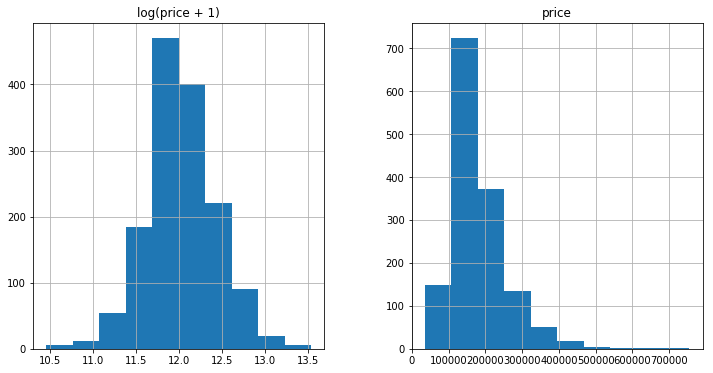

In [208]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [209]:
# log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

# log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

/Users/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log1p
  # This is added back by InteractiveShellApp.init_path()


##### -- End Preprocessing --

12.24769911637256
[12.2418857]
[207291.41324549]


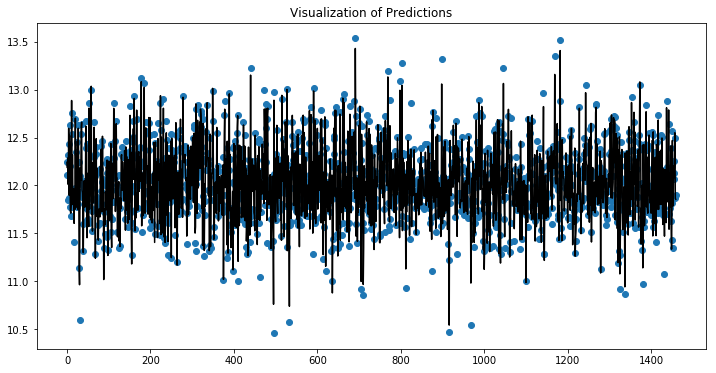

In [129]:
clf = Ridge(alpha=0.1)
clf.fit(X_train, y)

plt.scatter(X_train.index, y)
plt.plot(X_train.index, clf.predict(X_train), color='k')
plt.title('Visualization of Predictions')

# testing fit ON TRAINING DATA - first line
# price after get_dummies
print(y[0])
# feature prediction (should be close to above)
pred = clf.predict([X_train.iloc[0]])
print(pred)
# expm1 - original sale price - before get dummies
print(np.expm1(pred))

In [130]:
testids = test['Id']
ypred = clf.predict(X_test)
prices = np.expm1(ypred)

results_df = pd.DataFrame({ 'Id': testids, 'SalePrice': np.round(prices, 3) })
display(results_df.head())

results_df.to_csv('./house-prices/submission.csv', header=['Id', 'SalePrice'], index=False)

,Id,SalePrice
0,1461,121519.487
1,1462,159637.898
2,1463,187900.728
3,1464,200719.158
4,1465,199280.935


Received RMSE score of 0.13029 from Kaggle

#### 3\. Compare Ridge and Lasso

In [131]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

min rmse: 0.12733734668670765


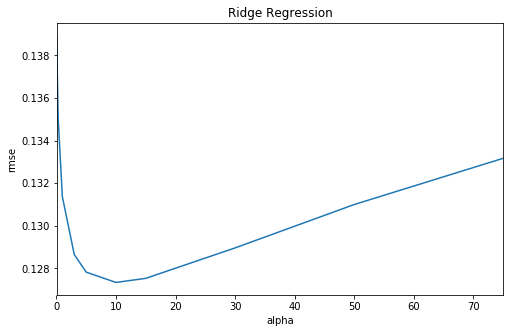

In [132]:
plt.figure(figsize=(8,5))
model_ridge = Ridge()

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")

print('min rmse: {}'.format(cv_ridge.min()))

min rmse: 0.18403762011012686


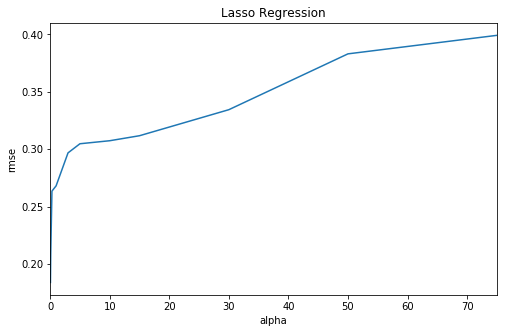

In [133]:
plt.figure(figsize=(8,5))

cv_lasso = [rmse_cv(Lasso(alpha=alpha)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")

print('min rmse: {}'.format(cv_lasso.min()))

In [134]:
print('Best scores (rounded):')
print('Ridge - {}'.format(round(cv_ridge.min(), 5)))
print('Lasso - {}'.format(round(cv_lasso.min(), 5)))

print('Currently, the Ridge model performs slightly better')

Best scores (rounded):
Ridge - 0.12734
Lasso - 0.18404
Currently, the Ridge model performs slightly better


#### 4\. l0 norm - Lasso

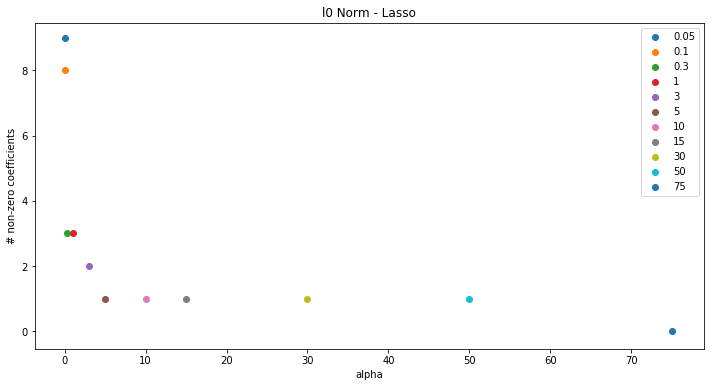

In [135]:
for a in alphas:
    l = Lasso(alpha=a)
    l.fit(X_train, y)
    nonzero = l.coef_ != 0
    count = list(nonzero).count(True)
    plt.scatter(a, count)

plt.title("l0 Norm - Lasso")
plt.xlabel("alpha")
plt.ylabel("# non-zero coefficients")
plt.legend(alphas)
plt.show()

#### 5\. Ensembling

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AvgPrice
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,1,0,0,0,0,1,0,24.567881
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,1,0,0,0,0,1,0,24.173900
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,1,0,0,0,0,1,0,24.571060
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,1,1,0,0,0,0,0,23.966982
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,1,0,0,0,0,1,0,25.174152


[0.11329716 0.14074838 0.15072168 0.11047163 0.12639486]
Min RMSE: 0.1104716292569804


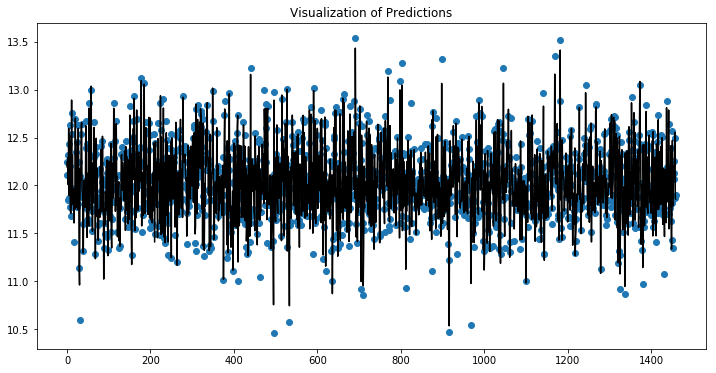

In [136]:
model1 = Ridge(alpha=0.1)
model2 = Lasso(alpha=0.1)

model1.fit(X_train, y)
model2.fit(X_train, y)

pred1 = model1.predict(X_train)
pred2 = model2.predict(X_train)

finalPred = pred1 + pred2
# --- finish ensembling ---

X_train_E = X_train.copy()
X_train_E['AvgPrice'] = finalPred
display(X_train_E.head())

fr = Ridge(alpha=0.1)
fr.fit(X_train_E, y)

plt.scatter(X_train_E.index, y)
plt.plot(X_train_E.index, fr.predict(X_train_E), color='k')
plt.title('Visualization of Predictions')

rmse = np.sqrt(-cross_val_score(fr, X_train_E, y, scoring="neg_mean_squared_error", cv = 5))
print(rmse)
print('Min RMSE: {}'.format(rmse.min()))

#### 6\. XGBoost

In [163]:
xgb_model = xgboost.XGBRegressor()

parameters = {
  'max_depth': [3, 6],
  'n_estimators': [100, 200],
  'reg_alpha': [0.5, 0.75]
}

# perform cross-validation on xgb with hyperparmeters
x_model = GridSearchCV(xgb_model, parameters, cv=10, n_jobs=-1)

# fit model
x_model.fit(X_train, y)

/Users/matt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/matt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 6], 'n_estimators': [100, 200], 'reg_alpha': [0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [210]:
# holdout accuracy
display(x_model.best_score_)

# mean squared error
preds = x_model.best_estimator_.predict(X_train)
mean_squared_error(y, preds)

0.897792199570013

0.005895737601714564

#### 7\. Feature Engineering and Model Pipelines

In [222]:
# feature engineering
pd.set_option('display.max_columns', 100)

# combining bedrooms and bathrooms on the assumption that certain combinations of these
# perform better, for example, 2 bed x 2 bath homes are popular
X_train['BedBath'] = X_train['FullBath'] * X_train['BedroomAbvGr']
X_train['BedBath'].head()

/Users/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    6
1    6
2    6
3    3
4    8
Name: BedBath, dtype: int64

In [258]:
# regression algorithms
models = {
    'lasso' : Lasso(random_state=123),
    'ridge' : Ridge(random_state=123),
    'enet': ElasticNet(random_state=123),
    'rf': RandomForestRegressor(random_state=123),
    'gb': GradientBoostingRegressor(random_state=123)
}

params = {
    'lasso': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
    },
    'ridge': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
    },
    'enet': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],                        
        'l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    'rf': {
        'n_estimators' : [100, 200],
        'max_features': ['auto', 'sqrt', 0.33]
    },
    'gb': {
        'n_estimators': [100, 200],
        'learning_rate' : [0.05, 0.1, 0.2],
        'max_depth': [1, 3, 5]
    }
}

In [259]:
# fit all models
fit = {}

for name, model in models.items():
    m = GridSearchCV(model, params[name], cv=10, n_jobs=-1)
    m.fit(X_train, y)
    
    fit[name] = m

In [260]:
for name, model in fit.items():
    print( name, model.best_score_ )

lasso 0.9005098129545336
ridge 0.8970015306164915
enet 0.9031425822022836
rf 0.8825737695378252
gb 0.9046604010706009


In [261]:
# gradient boosting has the highest accuracy on the test data
# remember, we do not have access to the sales price for the test data, kaggle has kept that secret
final_preds = fitted_models['gb'].best_estimator_.predict(X_train)
mean_squared_error(y, final_preds)

/Users/matt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.004083555922917491